# Ejercicio 1

In [1]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sympy import symbols, diff
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import lambdify

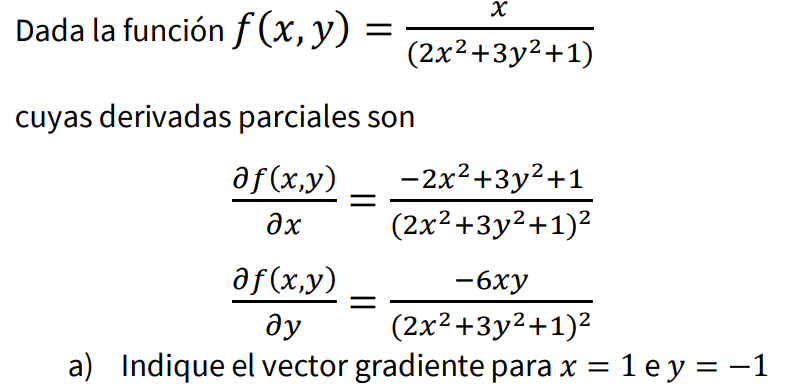

### Defino la funcion

In [3]:
# establece variables a usar en la funcion
x, y= symbols('x y', real=True)

# define la funcion
f = x/(2*x**2 + 3*y*y + 1)
f

x/(2*x**2 + 3*y**2 + 1)

### Defino las derivadas parciales

DERIVADA PARCIAL CON RESPECTO A X

In [4]:
df_dx = diff(f, x)
df_dx

-4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)

DERIVADA PARCIAL CON RESPECTO A Y

In [5]:
df_dy = diff(f, y)
df_dy

-6*x*y/(2*x**2 + 3*y**2 + 1)**2

### Grafico de la funcion

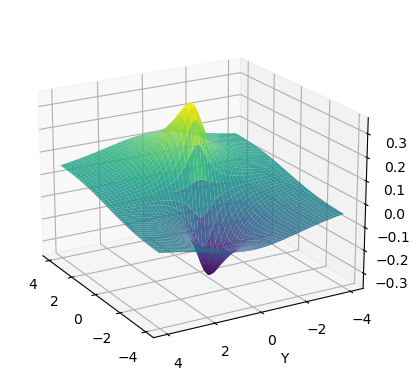

In [6]:
# Malla de puntos para graficar
X = np.linspace(-4, 4, 100)
Y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(X, Y)
Z = lambdify((x, y), f, 'numpy')(X, Y)

# Graficar
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=20, azim=150)  # Puedes ajustar los valores de elev y azim para cambiar la vista
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)

ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

### Gradiente

In [7]:
# coordenadas del punto a calcular
(px, py) = (1, -1)

# evalua la funcion f en x e y
pz = f.evalf(subs = {x:px, y:py}) #evalua puntos particulares sobre la funcion
print("\nDada la función f(x,y) = ", f)
print("  en (%f,%f) vale %f\n" % (px, py, pz) )

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz = df_dx.evalf(subs = {x:px, y:py} )
print(" - La derivada respecto de x es", df_dx )
print("   y en (%f,%f) vale %f\n" % (px, py, pz) )

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz = df_dy.evalf(subs = {x:px,y:py} )
print(" - La derivada respecto de y es", df_dy)
print("   y en (%f,%f) vale %f\n" % (px, py, pz) )


Dada la función f(x,y) =  x/(2*x**2 + 3*y**2 + 1)
  en (1.000000,-1.000000) vale 0.166667

 - La derivada respecto de x es -4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)
   y en (1.000000,-1.000000) vale 0.055556

 - La derivada respecto de y es -6*x*y/(2*x**2 + 3*y**2 + 1)**2
   y en (1.000000,-1.000000) vale 0.166667



El gradiente es = (0.0555 , 101666)

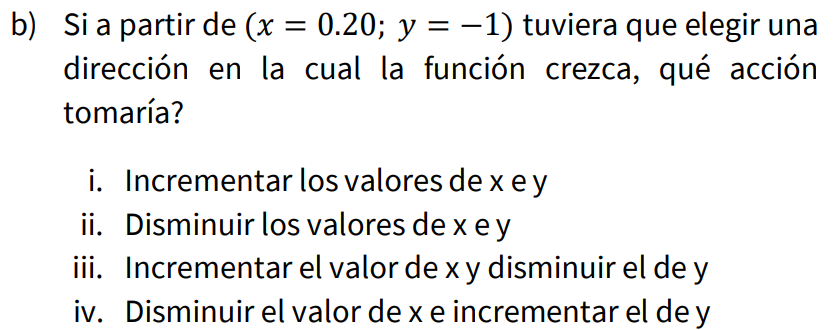

Para que la funcion crezca debemos movernos en la direccion del gradiente, por eso debemos incrementar los valores de x y de y

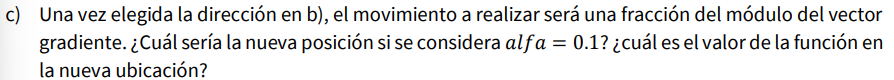

In [16]:
px = 0.2
py = -1

# la función crece en dirección al gradiente
rx = px+0.1*df_dx.evalf(subs = {x:px,y:py}) #0.1 es la tasa de crecimiento
ry = py+0.1*df_dy.evalf(subs = {x:px,y:py}) #evalua las derivadas parciales en x e y

rz = f.evalf(subs = {x:rx, y:ry}) #se evalua la funcion en esos puntos

print("\nLa función f(x,y) = ", f)
print(" ")
print(" en (%f,%f) vale %f" % (px, py, pz) )
print(" en (%f,%f) vale %f (crece)" % (rx, ry, rz) )



La función f(x,y) =  x/(2*x**2 + 3*y**2 + 1)
 
 en (0.200000,-1.000000) vale 0.166667
 en (0.223549,-0.992791) vale 0.055104 (crece)


REVISAR --> sineot que no crece jaja

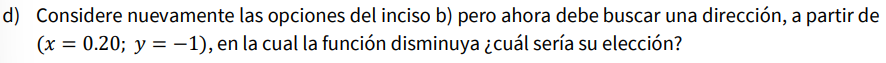

Para disminuir la funcion debemos movernos en la direccion opuesta al gradiente. 
- ii. disminuir los valores de x y de y

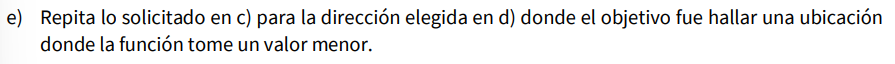

In [18]:
px = 0.2
py = -1

# la función decrece en dirección al gradiente
sx = px-0.1*df_dx.evalf(subs = {x:px,y:py})
sy = py-0.1*df_dy.evalf(subs = {x:px,y:py})
sz = f.evalf(subs = {x:sx, y:sy})

print("\nLa función f(x,y) = ", f)
print(" en (%f,%f) vale %f" % (px, py, pz) )
print(" en (%f,%f) vale %f (decrece)" % (sx, sy, sz) )


La función f(x,y) =  x/(2*x**2 + 3*y**2 + 1)
 en (0.200000,-1.000000) vale 0.166667
 en (0.176451,-1.007209) vale 0.042977 (decrece)


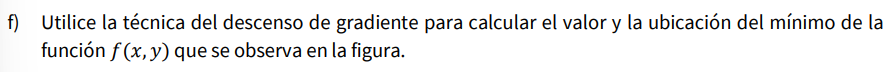

DESCENSO DE GRADIENTE: debo encontrar el minimo de la funcion dada

In [19]:
alpha = 0.1
iterations = 100
px = 0.2
py = -1


In [20]:
for i in range (iterations):

    #evaluo las derivadas parciales en el punto actual --> GRADIENTE
    grad_x = df_dx.evalf(subs={x:px, y:py})
    grad_y = df_dy.evalf(subs={x:px, y:py})

    #actualizo las coordenadas en la direccion OPUESTA al gradiente (por eso se resta)
    px = px - alpha * grad_x
    py = py - alpha * grad_y

    #evaluar la funcion en el nuevo punto
    f_val = f.evalf(subs={x:px, y:py})

    #iteracion 
    print(f' Iteracion {i+1}, la funcion f(x,y) = {f_val}')


print( " ")
print (f'Resultado final: x{px}, y{py}, f(x,y) = {f_val}')

 Iteracion 1, la funcion f(x,y) = 0.0429773928670840
 Iteracion 2, la funcion f(x,y) = 0.0370194103587587
 Iteracion 3, la funcion f(x,y) = 0.0311350643354632
 Iteracion 4, la funcion f(x,y) = 0.0253139466138573
 Iteracion 5, la funcion f(x,y) = 0.0195458287840791
 Iteracion 6, la funcion f(x,y) = 0.0138206482422196
 Iteracion 7, la funcion f(x,y) = 0.00812848986044787
 Iteracion 8, la funcion f(x,y) = 0.00245956458031902
 Iteracion 9, la funcion f(x,y) = -0.00319581401016542
 Iteracion 10, la funcion f(x,y) = -0.00884725422006535
 Iteracion 11, la funcion f(x,y) = -0.0145043111357729
 Iteracion 12, la funcion f(x,y) = -0.0201765111184033
 Iteracion 13, la funcion f(x,y) = -0.0258733752187094
 Iteracion 14, la funcion f(x,y) = -0.0316044407877958
 Iteracion 15, la funcion f(x,y) = -0.0373792804980087
 Iteracion 16, la funcion f(x,y) = -0.0432075178816452
 Iteracion 17, la funcion f(x,y) = -0.0490988383432256
 Iteracion 18, la funcion f(x,y) = -0.0550629944005258
 Iteracion 19, la funci

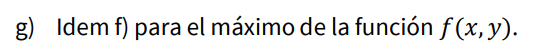

AUMENTO DE GRADIENTE: encuentro el maximo de la funcion

In [21]:
alpha = 0.1
iterations = 100
px = 0.2
py = -1


In [22]:
for i in range (iterations):

    #evaluo las derivadas parciales en el punto actual --> GRADIENTE
    grad_x = df_dx.evalf(subs={x:px, y:py})
    grad_y = df_dy.evalf(subs={x:px, y:py})

    #actualizo las coordenadas en la direccion del gradiente (para que CREZCA)
    px = px + alpha * grad_x
    py = py + alpha * grad_y

    #evaluar la funcion en el nuevo punto
    f_val = f.evalf(subs={x:px, y:py})

    #iteracion 
    print(f' Iteracion {i+1}, la funcion f(x,y) = {f_val}')


print(" ")
print (f'Resultado final: x{px}, y{py}, f(x,y) = {f_val}')

 Iteracion 1, la funcion f(x,y) = 0.0551039757815892
 Iteracion 2, la funcion f(x,y) = 0.0612725146601039
 Iteracion 3, la funcion f(x,y) = 0.0675354587128124
 Iteracion 4, la funcion f(x,y) = 0.0739030578778700
 Iteracion 5, la funcion f(x,y) = 0.0803855363855555
 Iteracion 6, la funcion f(x,y) = 0.0869930326055980
 Iteracion 7, la funcion f(x,y) = 0.0937355161071546
 Iteracion 8, la funcion f(x,y) = 0.100622677231735
 Iteracion 9, la funcion f(x,y) = 0.107663783815995
 Iteracion 10, la funcion f(x,y) = 0.114867499084065
 Iteracion 11, la funcion f(x,y) = 0.122241654246321
 Iteracion 12, la funcion f(x,y) = 0.129792969124580
 Iteracion 13, la funcion f(x,y) = 0.137526714359055
 Iteracion 14, la funcion f(x,y) = 0.145446309693037
 Iteracion 15, la funcion f(x,y) = 0.153552854803922
 Iteracion 16, la funcion f(x,y) = 0.161844592551202
 Iteracion 17, la funcion f(x,y) = 0.170316309788562
 Iteracion 18, la funcion f(x,y) = 0.178958688475897
 Iteracion 19, la funcion f(x,y) = 0.18775763005